#TASK 2
Using the image dataset from the following link
(https://drive.google.com/drive/folders/1QGOx4H_bQHCdHmmOu2yt8mbmgqe8tMPq?usp=sharing)
apply two classification models and compare their results. One model must be a convolutional neural
network (CNN), and the second must use a transfer learning algorithm for the same dataset

Let's start working on the Convolutional neural network

#**CONVOLUTIONAL NEURAL NETWORK**

**DATA PREPROCESSING**

**MOUNT THE GOOGLE DRIVE FOR ACCESS**

The folder and sub-folders containing the images has been uploaded to google drive

So, we need to mouth the google drive to gain access to the folder from the drive

In [ ]:
from google.colab import drive
data_dir = drive.mount('/content/drive/')

Mounted at /content/drive/


**READ THE FILES FROM THE FOLDER PATH**

Now that the drive has been mounted, copy the path of the folder of the data and call it data_dir(directory)

In [ ]:
# Load dataset
data_dir = "/content/drive/MyDrive/mplr_images_1/MLPR_Images"

**IMPORT LIBRARIES**

Import all libraries to be able to use all library functions for tensorflow and other libraries.

In [ ]:
#import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report, confusion_matrix

**LOAD THE FILES FROM THE FOLDER IN THE DRIVE**

The sets of codes below will allow to load our files from the folder folder from the drive

In [ ]:
# Function to load images from the folder
def load_images_from_folder(folder, label):
    images = []
    labels = []  # Labels are assigned based on sub-folder names
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (200, 200))  # Resize to 200x200 for CNN
            images.append(img)
            labels.append(label)
    return images, labels

# Folders and their corresponding labels
folders = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']
labels = [0, 1, 2, 3, 4, 5]  # labels for each category( 0 - background, 1 - product_1 and so on)

**Place all images into images and labels**

The goal is to be collect image data and labels from multiple folders (the sub-folder, product_1, product_2, product_3, product_4, product_5)


In [ ]:
all_images = []
all_labels = []

# Load images from each folder
for folder, label in zip(folders, labels):
    imgs, lbls = load_images_from_folder(os.path.join(data_dir, folder), label)
    all_images.extend(imgs)
    all_labels.extend(lbls)

**Convert all labels and images into array**

for easy computations of the images, they are converted into numerical computations

In [ ]:
# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

**Split the data into train and test**

The train_test_split function is commonly used for splitting a dataset into training and testing subsets.

The function takes four arguments:

all_images: The input features (the images).

all_labels: The corresponding labels (sub-folders) for the images.

test_size: 20% proportion of the dataset will be used for testing).

It returns four arrays:
X_train: The training data (images) for model training.

X_test: The testing data (images) for evaluating the model.

y_train: The training labels (corresponding labels for the training images).

y_test: The testing labels (corresponding labels for the testing images).
Purpose:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

**NORMALIZE THE DATA**

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network.

Standardize values to be in the [0, 1] range

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#check if all data has been successfully converted to array
X_train

array([[[[0.88235295, 0.8509804 , 0.89411765],
         [0.9019608 , 0.88235295, 0.88235295],
         [0.87058824, 0.84705883, 0.8666667 ],
         ...,
         [0.08235294, 0.05882353, 0.18039216],
         [0.10196079, 0.03921569, 0.19215687],
         [0.08235294, 0.07843138, 0.21960784]],

        [[0.8784314 , 0.84705883, 0.8901961 ],
         [0.9137255 , 0.8980392 , 0.8980392 ],
         [0.88235295, 0.85882354, 0.8784314 ],
         ...,
         [0.03921569, 0.01568628, 0.13725491],
         [0.02745098, 0.00784314, 0.1254902 ],
         [0.05098039, 0.02745098, 0.14509805]],

        [[0.8627451 , 0.83137256, 0.87058824],
         [0.8627451 , 0.84313726, 0.84313726],
         [0.8980392 , 0.87058824, 0.8901961 ],
         ...,
         [0.07843138, 0.05490196, 0.17254902],
         [0.17254902, 0.18039216, 0.27058825],
         [0.19607843, 0.15294118, 0.25490198]],

        ...,

        [[0.45882353, 0.49019608, 0.6039216 ],
         [0.5411765 , 0.54509807, 0.6666667 ]

In [ ]:
# Print class names
class_names = os.listdir(data_dir)
print("Class names:", class_names)

Class names: ['Product_4', 'Product_1', 'Product_5', 'Product_2', 'Product_3', 'Background']


**IMAGE VISUALIZATION**

It is important to check if the images are auccessfully read into the python environment to get the idea of the dataset

Now, let's see some of our images read from the folder, 3 per class. This is to check if our images is successfully read from the directory

This code snippet visualizes a few images from each sub-folder, allowing to inspect the data visually.


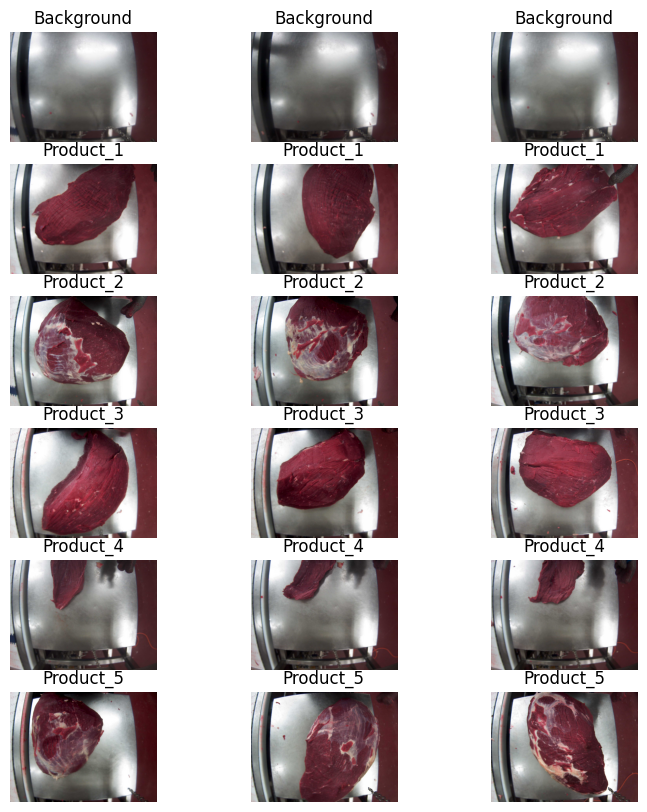

In [ ]:
# Define the sub-folders containing the images
sub_folders = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']

# Visualize some images from each sub-folder
plt.figure(figsize=(15, 10))
for i, folder in enumerate(sub_folders):
    folder_path = os.path.join(data_dir, folder)
    images = os.listdir(folder_path)[:3]  # Display the first 3 images from each sub-folder
    for j, image_name in enumerate(images):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(len(sub_folders), 5, i*5 + j + 1)  #Creates a subplot in the grid.
        plt.imshow(image)
        plt.axis('off')
        plt.title(folder)
plt.show()

**BATCHING**

The shape of the data arrays is crucial for understanding the dimensions of your dataset

In [ ]:
image_shapes = []
labels = []

# Iterate through the subdirectories (classes) in the dataset directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)  # Reads the image using OpenCV
        image_shapes.append(image.shape)  #ollects the shape (dimensions) of the image and appends it
        labels.append(class_name)


In [ ]:
# Convert the lists to numpy arrays
X = np.array(image_shapes)
y = np.array(labels)

# Print the shape of the data
print("Standardized Image Data Shape:", X.shape)
print("Labels Shape:", y.shape)

Standardized Image Data Shape: (1938, 3)
Labels Shape: (1938,)


**Check the number of samples per labels**

In [ ]:
# Initialize a dictionary to store the count of samples in each class
class_counts = {}

# Iterate through the sub-folders (classes) in the directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    num_samples = len(os.listdir(class_dir))
    class_counts[class_name] = num_samples

# Print the class counts
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")


Class Counts:
Product_4: 385 samples
Product_1: 500 samples
Product_5: 600 samples
Product_2: 14 samples
Product_3: 400 samples
Background: 39 samples


**DATA VISUALIZATION**

Let's visualize the class distribution using bar chart

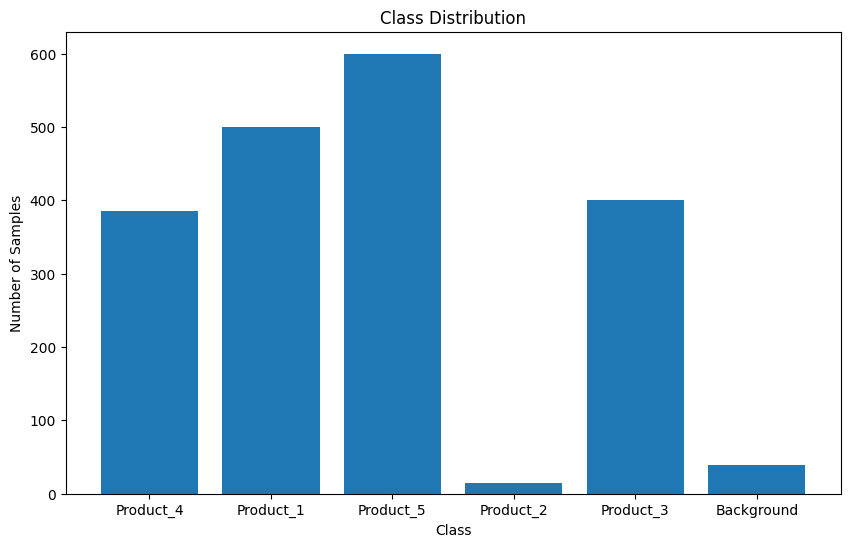

In [ ]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

**DATA AUGMENTATION**


 This makes geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.


To prevent models from overfitting.

To improve the model accuracy.

Also addresses imbalance dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Example of applying data augmentation to an image
img = cv2.imread('/content/drive/MyDrive/mplr_images_1/MLPR_Images/Product_1/1500276892.jpg')  #an example image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = img.reshape((1,) + img.shape)  # Reshape for flow method

# Generate augmented images
augmented_images = []
for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))  # Append augmented image
    if len(augmented_images) >= 6:  # Generate 6 augmented images
        break


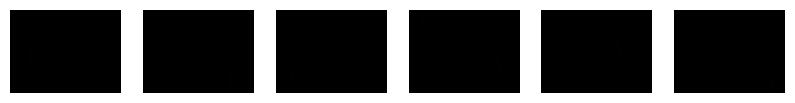

In [ ]:
# Display the augmented images
plt.figure(figsize=(10, 5))
for i in range(len(augmented_images)):
    plt.subplot(1, 6, i+1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()

#**CREATE MODEL**

I'll create the model using Sequential

INPUT LAYER: There will input layer using 16 neurons. This is feeding  the image directly

HIDDEN LAYERS: I'll use two hidden layers, 32 neurons for each layers

FLATTEN LAYER: convert the multi-dimensional feature maps convolutional and pooling layers into a one-dimensional array or vector.
It “flattens” the spatial dimensions into a single long vector

DENSE LAYER: It connects every neuron from the previous layer to every neuron in the current layer.Using 64 neurons

DROPOUT LAYER: a regularization technique used during training to prevent overfitting. It helps prevent the model from relying too heavily on specific features. i'm using 80%

OUTPUT LAYER:  is the final layer of the neural network, responsible for producing the network's output predictions. Using dense layer of 6 neurons which is the length of the classes.

In [ ]:
model = models.Sequential()
#input layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200,200, 3)))
model.add(layers.MaxPooling2D())
#hidden layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
#hidden layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

#flatten
model.add(layers.Flatten())
#dense layer
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.8))
#output layer
model.add(layers.Dense(6, activation='softmax'))

In [ ]:
# Build the model
model.build((None, 200,200, 3)) #build the model using image height and width of 200


model.summary() #check the model putput shape and param

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 67712)             0

**DATA COMPILATION**

Optimizer: This parameter specifies the optimization algorithm used during training.  **Adam** (Adaptive Moment Estimation) combines the benefits of both AdaGrad and RMSProp. It adapts the learning rate based on the moving averages of gradients.

Loss: The loss parameter defines the objective function that the model aims to minimize during training. Using **Sparse_categorical_crossentropy** is commonly used for multi-class classification problems where the target labels are integers (e.g., class labels).

Metrics: Using **accuracy** as metrics, means that the model will compute the accuracy (percentage of correct predictions) on the validation data during training.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**TRAIN MODEL**

Epochs: This variable specifies the number of times the model will iterate over the entire training dataset.

The model.fit() function **trains** the model using the specified data and updates its internal parameters (weights and biases) to minimize the specified loss function.

In [ ]:
# Train the model
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/100
49/49 [==============================] - 2s 38ms/step - loss: 0.3561 - accuracy: 0.8342 - val_loss: 0.4416 - val_accuracy: 0.9510
Epoch 2/100
49/49 [==============================] - 1s 28ms/step - loss: 0.3602 - accuracy: 0.8439 - val_loss: 0.4620 - val_accuracy: 0.9485
Epoch 3/100
49/49 [==============================] - 2s 35ms/step - loss: 0.3605 - accuracy: 0.8535 - val_loss: 0.4135 - val_accuracy: 0.9510
Epoch 4/100
49/49 [==============================] - 2s 31ms/step - loss: 0.3745 - accuracy: 0.8381 - val_loss: 0.5732 - val_accuracy: 0.9510
Epoch 5/100
49/49 [==============================] - 1s 27ms/step - loss: 0.3986 - accuracy: 0.8252 - val_loss: 0.5119 - val_accuracy: 0.9459
Epoch 6/100
49/49 [==============================] - 1s 27ms/step - loss: 0.3468 - accuracy: 0.8561 - val_loss: 0.4120 - val_accuracy: 0.9304
Epoch 7/100
49/49 [==============================] - 1s 30ms/step - loss: 0.3318 - accuracy: 0.8490 - val_loss: 0.4430 - val_accuracy: 0.9485
Epoch 

**VISUALIZE THE TRAINING AND VALIDATION ACCURACY DATA**

Visualize to see if model over fits or fits just well

The left side shows the accuracy of training and validation dataset

the right side of the graph shows the loss of training and validation dataset

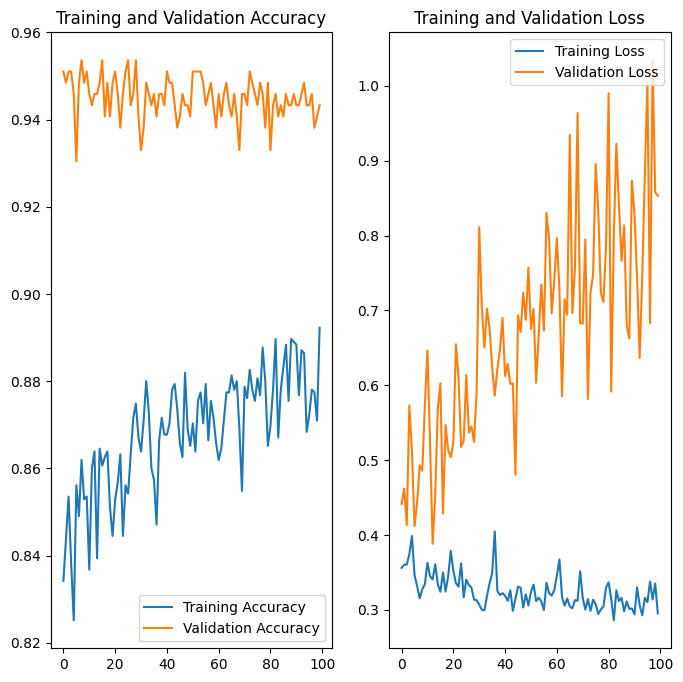

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**EVALUATE THE MODEL**

it’s essential to evaluate its performance on unseen data (the test dataset).

The model.evaluate() function computes the loss and Accuracy) on the test data

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

13/13 [==============================] - 0s 11ms/step - loss: 0.8530 - accuracy: 0.9433
Test Loss: 0.8530216813087463, Test Accuracy: 0.9432989954948425


In [ ]:
# Access training history (accuracy and loss)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training Accuracy: {train_accuracy[-1]:.4f}") #picks the final row data for training
print(f"Validation Accuracy: {val_accuracy[-1]:.4f}")  #picks the final row data for validation
print(f"Training Loss: {train_loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")



Training Accuracy: 0.8923
Validation Accuracy: 0.9433
Training Loss: 0.2953
Validation Loss: 0.8530


**PREDICTION**

Let's see how well the model can predict an image class

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Product_3/1500275183.jpg' #image from product_3
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)



# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 23ms/step
Predicted class: Product_3


In [ ]:

# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Background/background1501738359.895.jpg' #image from Background
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)



# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 17ms/step
Predicted class: Background


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Product_2/1500276485.jpg' #image from product_2
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)


# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 18ms/step
Predicted class: Product_4


**OBSERVATION**

It can be seen from the history called that the model and epochs set gave the following

TRAINING ACCURACY (0.8794): It indicates how well the model predicts the correct labels for the examples it has seen during training.
An accuracy of 0.8794 means that approximately 87.94% of the training examples were correctly classified by the model.


VALIDATION ACCURACY (0.9485): The validation accuracy measures how well the model generalizes to unseen data i.e the validation dataset.
An accuracy of 0.9485 means that approximately 94.85% of the validation examples were correctly classified by the model.

Generally, a high validation accuracy suggests that the model is performing well on unseen data.


TRAINING LOSS (0.2969): The training loss (also known as the training error) quantifies how well the model’s predictions match the actual labels during training. A lower training loss indicates better performance.


VALIDATION LOSS(0.4599): The validation loss measures how well the model performs on the validation data. Similar to training loss, a lower validation loss is desirable. A value of 0.4599 suggests that the model is not overfitting

CLASS PREDICTION:


In summary the model seems to perform well, with high validation accuracy and relatively low losses

#**TRANSFER LEARNING**

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It saves time, computational resources, and often improves performance


**DATA PREPROCESSING**


IMPORT LIBRARIES

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelBinarizer

LabelBinarizer: is a utility class that converts class labels ( backgrounds, product_1,product_2,etc) into one-hot encoded vectors.

fit_transform(y_train): This method fits the binarizer to the training labels (y_train) and transforms them into one-hot encoded format.

transform(y_test): This method applies the same transformation to the test labels (y_test).

In [ ]:
# Convert labels to one-hot encoded format
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)


Firstly, we freeze the base model, i.e the model from convolutional neural network by setting

base_model.trainable = False

This is to see how the model would perform without the base model

In [ ]:
input_shape = (200, 200, 3)  # Assuming you're using MobileNetV2 with 224x224 input size

# Load VGG16 pre-trained on ImageNet dataset, excluding the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


# Freeze convolutional base model
base_model.trainable = False


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)  # dense layer to interconnect layers
predictions = Dense(len(label_binarizer.classes_), activation='softmax')(x)  # Number of product categories  which is 6


# Build the model
model = Model(inputs=base_model.input, outputs=predictions) # input data is base model and output is the prediction just set

# Show shapes of the layers
for layer in model.layers:
    print(layer.name, layer.output_shape)


input_1 [(None, 200, 200, 3)]
block1_conv1 (None, 200, 200, 64)
block1_conv2 (None, 200, 200, 64)
block1_pool (None, 100, 100, 64)
block2_conv1 (None, 100, 100, 128)
block2_conv2 (None, 100, 100, 128)
block2_pool (None, 50, 50, 128)
block3_conv1 (None, 50, 50, 256)
block3_conv2 (None, 50, 50, 256)
block3_conv3 (None, 50, 50, 256)
block3_pool (None, 25, 25, 256)
block4_conv1 (None, 25, 25, 512)
block4_conv2 (None, 25, 25, 512)
block4_conv3 (None, 25, 25, 512)
block4_pool (None, 12, 12, 512)
block5_conv1 (None, 12, 12, 512)
block5_conv2 (None, 12, 12, 512)
block5_conv3 (None, 12, 12, 512)
block5_pool (None, 6, 6, 512)
global_average_pooling2d (None, 512)
dense_2 (None, 64)
dense_3 (None, 6)


**DATA AUGMENTATION**

Just like the convolutional neural network

This makes geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.
The function remians the same

To prevent models from overfitting.

To improve the model accuracy.

Also addresses imbalance dataset


In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

**COMPILE THE MODEL**

*The optimizer is a critical component of training a neural network.
The learning rate  determines how quickly the model adjusts its weights during training.

*Threshold for Classification: The threshold value is used for binary classification tasks.
After making predictions, the model assigns class labels based on whether the predicted probability exceeds this threshold.
For example, *if the predicted probability for a positive class is greater than the threshold, the model predicts that class; otherwise, it predicts the negative class.*

Compiling the Model:
The model.compile() function configures the model for training.

In [ ]:
# Compile the model with learning rate and threshold
optimizer = Adam(learning_rate=0.001)
threshold = 0.5
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

**DATA TRAINING**

Epochs: represents the number of times the entire dataset will be iterated during training. Each epoch consists of one forward pass (prediction) and one backward pass (adjusting weights based on the error).

*TRAINING THE MODEL:

The model.fit() function is used to train a machine learning model. It takes several arguments:

train_datagen.flow(X_train, y_train_encoded, batch_size=32): This *generates batches of augmented data*  from the training set (X_train and y_train_encoded).

*validation_data=(X_test, y_test_encoded): This provides validation data (usually a separate portion of the dataset) to evaluate the model’s performance during training.


*BACKPROPAGATING AND OPTIMIZATION:
During each epoch, the model computes the loss (error) between its predictions and the actual labels (ground truth).
It then performs backpropagation to adjust the weights using an optimization algorithm (such as stochastic gradient descent) to minimize the loss.
The process repeats for the specified number of epochs until convergence.

In [ ]:
epochs = 100

# Train the model
history = model.fit(train_datagen.flow(X_train, y_train_encoded, batch_size=32),
                    validation_data=(X_test, y_test_encoded),
                    epochs=epochs)

Epoch 1/100
49/49 [==============================] - 34s 527ms/step - loss: 1.5504 - accuracy: 0.2845 - val_loss: 1.4835 - val_accuracy: 0.2165
Epoch 2/100
49/49 [==============================] - 22s 434ms/step - loss: 1.4845 - accuracy: 0.2994 - val_loss: 1.4815 - val_accuracy: 0.2835
Epoch 3/100
49/49 [==============================] - 21s 434ms/step - loss: 1.4842 - accuracy: 0.3065 - val_loss: 1.5211 - val_accuracy: 0.2680
Epoch 4/100
49/49 [==============================] - 22s 450ms/step - loss: 1.4879 - accuracy: 0.2994 - val_loss: 1.4786 - val_accuracy: 0.2655
Epoch 5/100
49/49 [==============================] - 23s 466ms/step - loss: 1.4851 - accuracy: 0.3065 - val_loss: 1.4739 - val_accuracy: 0.2809
Epoch 6/100
49/49 [==============================] - 23s 461ms/step - loss: 1.4833 - accuracy: 0.2935 - val_loss: 1.5104 - val_accuracy: 0.2603
Epoch 7/100
49/49 [==============================] - 19s 387ms/step - loss: 1.4858 - accuracy: 0.3065 - val_loss: 1.5001 - val_accuracy:

**DATA VISUALIZATION**



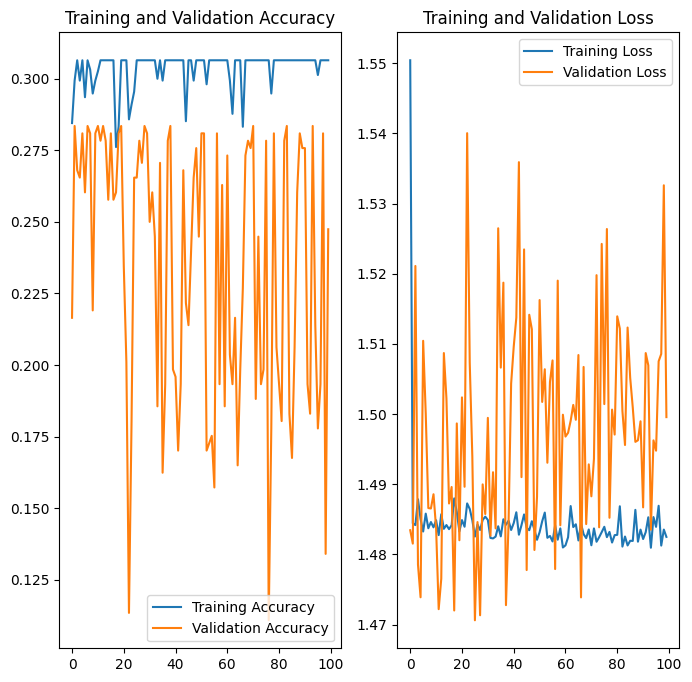

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Access training history (accuracy and loss)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracy[-1]:.4f}")
print(f"Training Loss: {train_loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")



Training Accuracy: 0.3065
Validation Accuracy: 0.2474
Training Loss: 1.4825
Validation Loss: 1.4996


**OBSERVATION**


*TRAINING ACCURACY (0.3065): It is the ratio of correctly predicted instances to the total number of instances in the training set.
This means that the model’s predictions match the actual labels for about 30.65% of the training examples.

*VALIDATION ACCURACY (0.4304): The validation accuracy measures the model’s performance on a separate validation dataset (usually not seen during training). It helps assess how well the model generalizes to unseen data. This indicates how accurately the model predicts the validation examples.

TRAINING LOSS (1.4844): quantifies the difference between the model’s predictions and the actual labels during training. It reflects how well the model fits the training data.

VALIDATION LOSS (1.4396): measures the error on the validation dataset. It provides insight into how well the model generalizes beyond the training data.

In summary, the model's performance is poor and would not predict accurately well. It has a very low chance of predicting correctly. The model would not fit well based on the training loss, margin error for the validation loss is quite much.


**NOTE**
The base model has been frozen and set to false

From the graph, it seems unstable also

**FINE TUNING**

Now lets unfreeze the base model by setting it to true and create a transfer learning model based on this and see how it performs.

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 50

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


**COMPILE THE MODEL**

setting the base learning rate and threshold and using Adam as optimizers.

The functions of these has been earlier explained

In [ ]:
# Compile the model
base_learning_rate = 0.0001
threshold = 0.5
optimizer = Adam(learning_rate=base_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

**TRAIN THE MODEL**

In [ ]:
epochs = 100

# Train the model
history = model.fit(X_train, y_train_encoded, batch_size=32,
                    validation_data=(X_test, y_test_encoded),
                    epochs=epochs)

Epoch 1/100
49/49 [==============================] - 10s 165ms/step - loss: 1.4995 - accuracy: 0.2613 - auc: 0.6947 - val_loss: 1.4406 - val_accuracy: 0.3866 - val_auc: 0.7671
Epoch 2/100
49/49 [==============================] - 7s 152ms/step - loss: 1.4529 - accuracy: 0.4355 - auc: 0.7612 - val_loss: 1.3945 - val_accuracy: 0.5206 - val_auc: 0.8091
Epoch 3/100
49/49 [==============================] - 8s 174ms/step - loss: 1.4063 - accuracy: 0.4535 - auc: 0.7928 - val_loss: 1.3537 - val_accuracy: 0.5077 - val_auc: 0.8343
Epoch 4/100
49/49 [==============================] - 7s 148ms/step - loss: 1.3683 - accuracy: 0.4845 - auc: 0.8245 - val_loss: 1.3193 - val_accuracy: 0.5438 - val_auc: 0.8554
Epoch 5/100
49/49 [==============================] - 7s 148ms/step - loss: 1.3348 - accuracy: 0.5045 - auc: 0.8461 - val_loss: 1.2894 - val_accuracy: 0.5541 - val_auc: 0.8867
Epoch 6/100
49/49 [==============================] - 8s 169ms/step - loss: 1.3006 - accuracy: 0.5290 - auc: 0.8783 - val_los

**DATA VISUALIZATION**

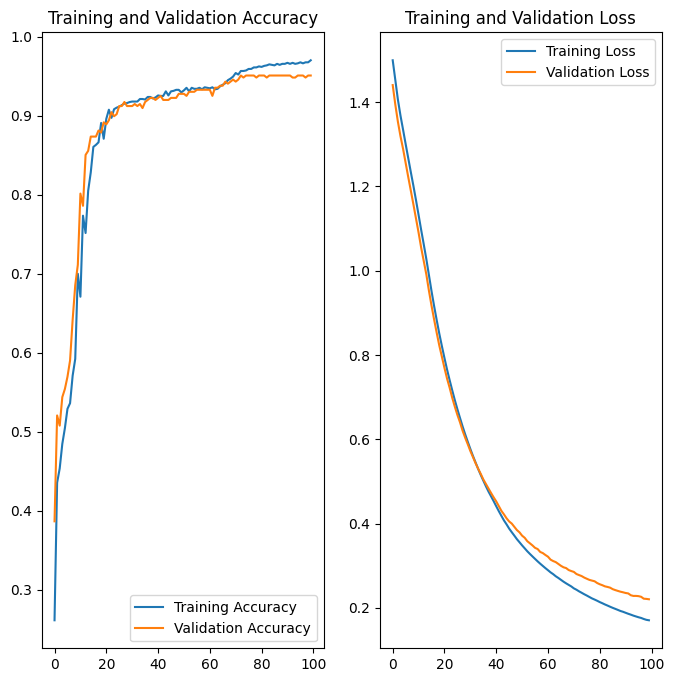

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Access training history (accuracy and loss)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training Accuracy: {train_accuracy[-1]:.4f}")
print(f"Validation Accuracy: {val_accuracy[-1]:.4f}")
print(f"Training Loss: {train_loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")



Training Accuracy: 0.9703
Validation Accuracy: 0.9510
Training Loss: 0.1704
Validation Loss: 0.2203


**PREDICTION**

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Product_2/1500276485.jpg' #image from product_2
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)


1/1 [==============================] - 1s 1s/step


In [ ]:

# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

Predicted class: Product_5


In [ ]:

# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Background/background1501738359.895.jpg' #image from background
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)


1/1 [==============================] - 0s 21ms/step


In [ ]:

# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

Predicted class: Background


In [ ]:

# Load and preprocess the new image
image_path = '/content/drive/MyDrive/mplr_images_1/MLPR_Images/Product_3/1500275183.jpg' #image from product_3
image = load_img(image_path, target_size=(200, 200))
image_array = img_to_array(image)
image_array /= 255.0  # Normalize pixel values

# Expand dimensions to match the input shape expected by the model
image_array = np.expand_dims(image_array, axis=0)

# Get the predicted class probabilities
predictions = model.predict(image_array)



# Choose the class with the highest probability
predicted_class_index = np.argmax(predictions)
#  list of class names
class_names = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']  # class names
predicted_class = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 19ms/step
Predicted class: Product_3


**OBSERVATION**


*TRAINING ACCURACY (0.9600): The model's predictions match the actual label of the training examples at 96%. This shows the model would give good prediction match.

*VALIDATION ACCURACY (0.9639): The model's performance would predict more accurately when checked with validation dataset (usually not seen during training). This is at 96.39%.

TRAINING LOSS (0.1956): the difference between the model's prediction and actual dataset fits well enough. It can be seen from the graph. It reflects how well the model fits the training data.

VALIDATION LOSS (0.2070): the error on the validation dataset is really reduced. The model would generalise well beyond the training data.

In summary, the model's performance is good and would predict accurately well. It has a very high chance of predicting correctly. The model would fit well based on the training loss, margin error for the validation loss is quite reduced.



**PREDICTION**

We can see that from checking three examples, two were predicted correctly.

#REFERENCES

Tensor flow - image clasification - https://www.tensorflow.org/tutorials/images/classification

Tensor flow - transfer learning - https://www.tensorflow.org/tutorials/images/transfer_learning

keras - https://keras.io/api/applications/

starter code - Machine Learning - Paul Liard

Data Augmentation - https://www.datacamp.com/tutorial/complete-guide-data-augmentation

RANSFER LEARNING - https://machinelearningmastery.com/transfer-learning-for-deep-learning/

